In [2]:
# EduFit: Adaptive Study Companion - ML Model
# This Jupyter notebook implements the machine learning components of EduFit, including:
# - K-means clustering to identify learning styles
# - Random Forest Classifier to recommend study strategies
# - Study plan generation with curated resources and advice

In [3]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic survey data
survey_data = pd.DataFrame({
    'pref_resource': np.random.choice(['Videos', 'Podcasts', 'Practice', 'Reading'], 50),
    'daily_study_hours': np.random.choice(['Less than 1 hour', '1–2 hours', '2–3 hours', '3–4 hours', 'More than 4 hours'], 50),
    'subject': np.random.choice(['Math', 'Science', 'Other'], 50),
    'preferred_strategy': np.random.choice(['Pomodoro', 'Active Recall', 'Spaced Repetition', 'Note-Taking'], 50)
})

# Save to data/raw
survey_data.to_csv('../data/raw/survey.csv', index=False)
print("Synthetic survey data saved to data/raw/survey.csv")
print(survey_data.head())

Synthetic survey data saved to data/raw/survey.csv
  pref_resource daily_study_hours subject preferred_strategy
0      Practice         2–3 hours    Math  Spaced Repetition
1       Reading         3–4 hours    Math  Spaced Repetition
2        Videos         3–4 hours    Math      Active Recall
3      Practice  Less than 1 hour   Other      Active Recall
4      Practice         2–3 hours    Math        Note-Taking


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load UCI dataset (first 50 records)
uci_data = pd.read_csv('../data/raw/student-mat.csv', sep=';')
uci_data = uci_data[['studytime', 'absences']].head(50)

# Handle missing values
uci_data.fillna(uci_data.mean(), inplace=True)

# Load survey data
survey_data = pd.read_csv('../data/raw/survey.csv')

# Encode categorical survey variables
pref_map = {'Videos': 1, 'Podcasts': 2, 'Practice': 3, 'Reading': 4}
hours_map = {'Less than 1 hour': 0.5, '1–2 hours': 1.5, '2–3 hours': 2.5, '3–4 hours': 3.5, 'More than 4 hours': 4.5}
subject_map = {'Math': 1, 'Science': 2, 'Other': 3}
strategy_map = {'Pomodoro': 0, 'Active Recall': 1, 'Spaced Repetition': 2, 'Note-Taking': 3}

survey_data['pref_resource'] = survey_data['pref_resource'].map(pref_map)
survey_data['daily_study_hours'] = survey_data['daily_study_hours'].map(hours_map)
survey_data['subject'] = survey_data['subject'].map(subject_map)
survey_data['preferred_strategy'] = survey_data['preferred_strategy'].map(strategy_map)

# Merge datasets
data = uci_data.copy()
data['pref_resource'] = survey_data['pref_resource'].head(50)
data['daily_study_hours'] = survey_data['daily_study_hours'].head(50)
data['subject'] = survey_data['subject'].head(50)
data['preferred_strategy'] = survey_data['preferred_strategy'].head(50)

# Normalize numerical features
scaler = StandardScaler()
data[['studytime', 'absences', 'daily_study_hours']] = scaler.fit_transform(data[['studytime', 'absences', 'daily_study_hours']])

# Save processed data
data.to_csv('../data/processed/processed_data.csv', index=False)
print("Processed data saved to data/processed/processed_data.csv")
print(data.head())

Processed data saved to data/processed/processed_data.csv
   studytime  absences  pref_resource  daily_study_hours  subject  \
0   0.085160  0.286591              3          -0.074329        1   
1   0.085160 -0.090502              4           0.668965        1   
2   0.085160  1.040776              1           0.668965        1   
3   1.504492 -0.467595              3          -1.560918        3   
4   0.085160 -0.090502              3          -0.074329        1   

   preferred_strategy  
0                   2  
1                   2  
2                   1  
3                   1  
4                   3  


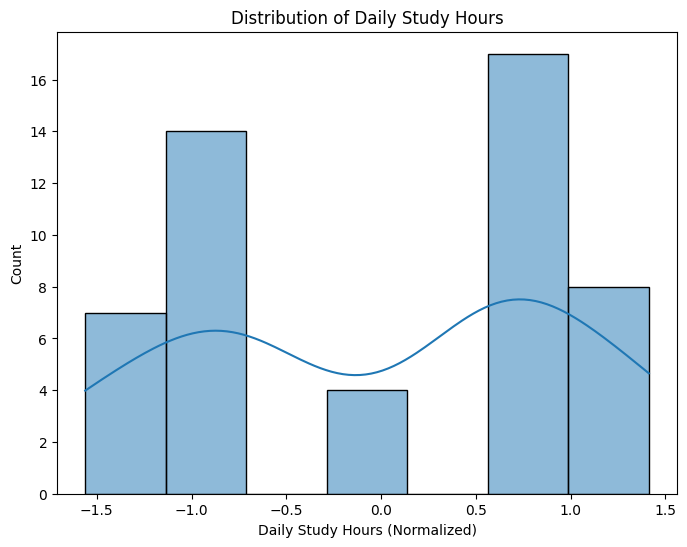

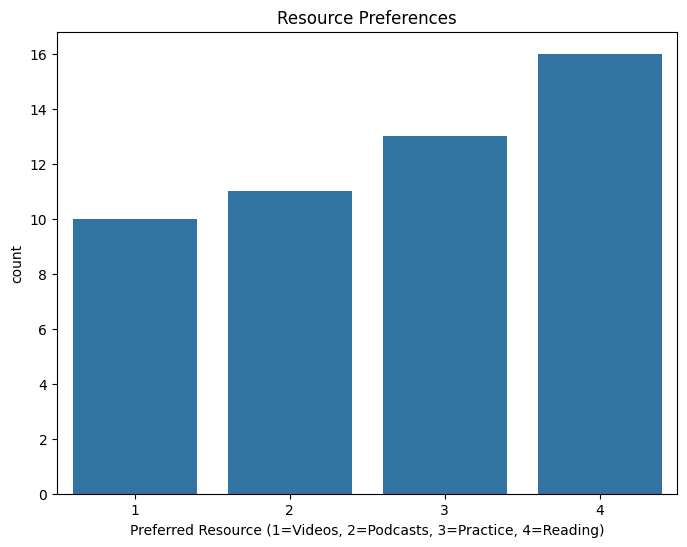

In [6]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Load processed data
data = pd.read_csv('../data/processed/processed_data.csv')

# Plot distribution of study hours
plt.figure(figsize=(8, 6))
sns.histplot(data['daily_study_hours'], kde=True)
plt.title('Distribution of Daily Study Hours')
plt.xlabel('Daily Study Hours (Normalized)')
plt.savefig('../figures/study_hours_distribution.png')
plt.show()

# Plot resource preferences
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='pref_resource')
plt.title('Resource Preferences')
plt.xlabel('Preferred Resource (1=Videos, 2=Podcasts, 3=Practice, 4=Reading)')
plt.savefig('../figures/resource_preferences.png')
plt.show()
